In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
file_path = r'D:\Research\Vision\mra\root\models\segmentation\skullnet_train.csv'

df = pd.read_csv(file_path)
df.head()

,epoch,acc,dice_coef,iou_coef,loss,lr,val_acc,val_dice_coef,val_iou_coef,val_loss
0,0,0.923528,0.952332,0.912648,0.091851,0.005,0.927558,0.968031,0.938088,0.062231
1,1,0.927729,0.974631,0.950550,0.050388,0.005,0.928296,0.976334,0.953783,0.046183
2,2,0.928006,0.977609,0.956216,0.044810,0.005,0.841223,0.644044,0.481354,0.823258
3,3,0.927900,0.977184,0.955419,0.045712,0.005,0.928444,0.978753,0.958404,0.041715
4,4,0.928191,0.979653,0.960129,0.040825,0.005,0.928403,0.978516,0.957948,0.042960


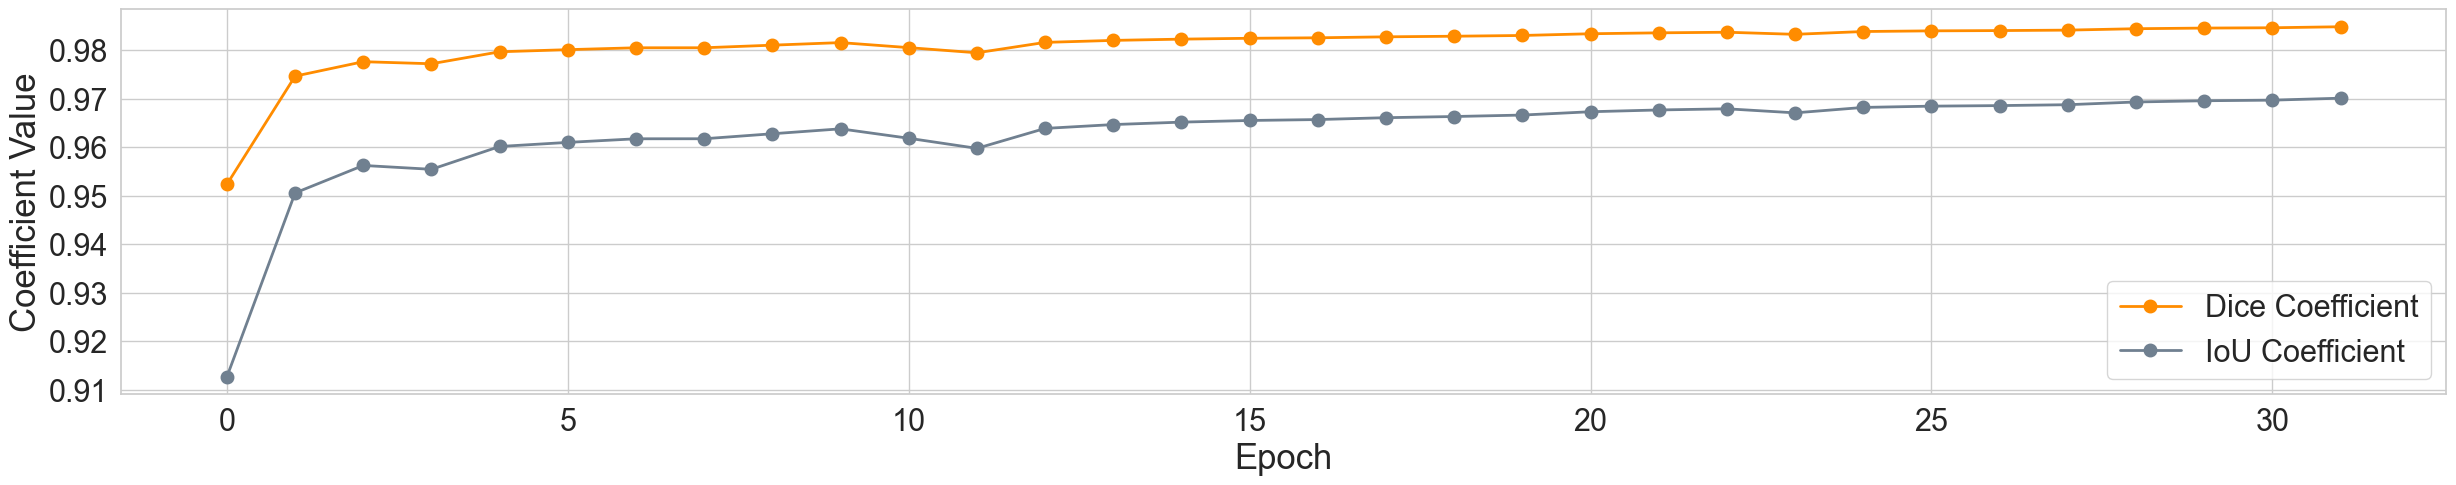

In [3]:
# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define pastel dark gray and pastel orange colors
pastel_dark_gray = "#708090"  # Softened dark gray (Slate Gray)
pastel_orange = "#ff8c00"     # Pastel dark orange (Dark Orange)

# Create a figure for the plot
plt.figure(figsize=(30, 5))

# Plot Dice Coefficient and IoU Coefficient with pastel dark gray and orange colors and markers
plt.plot(df['epoch'], df['dice_coef'], label='Dice Coefficient', color=pastel_orange, linewidth=2, marker='o', markersize=8, markerfacecolor=pastel_orange, markeredgewidth=2)
plt.plot(df['epoch'], df['iou_coef'], label='IoU Coefficient', color=pastel_dark_gray, linewidth=2, marker='o', markersize=8, markerfacecolor=pastel_dark_gray, markeredgewidth=2)

# Title and labels with increased font size
plt.xlabel('Epoch', fontsize=25)  # Increased font size for x-axis
plt.ylabel('Coefficient Value', fontsize=25)  # Increased font size for y-axis

# Increase the font size of axis tick labels
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Add a legend with increased font size
plt.legend(fontsize=22)

# Save the figure with tight bounding box
plt.savefig('../plots/outputs/segmentation-train.pdf', bbox_inches='tight')

# Show the plot
plt.show()

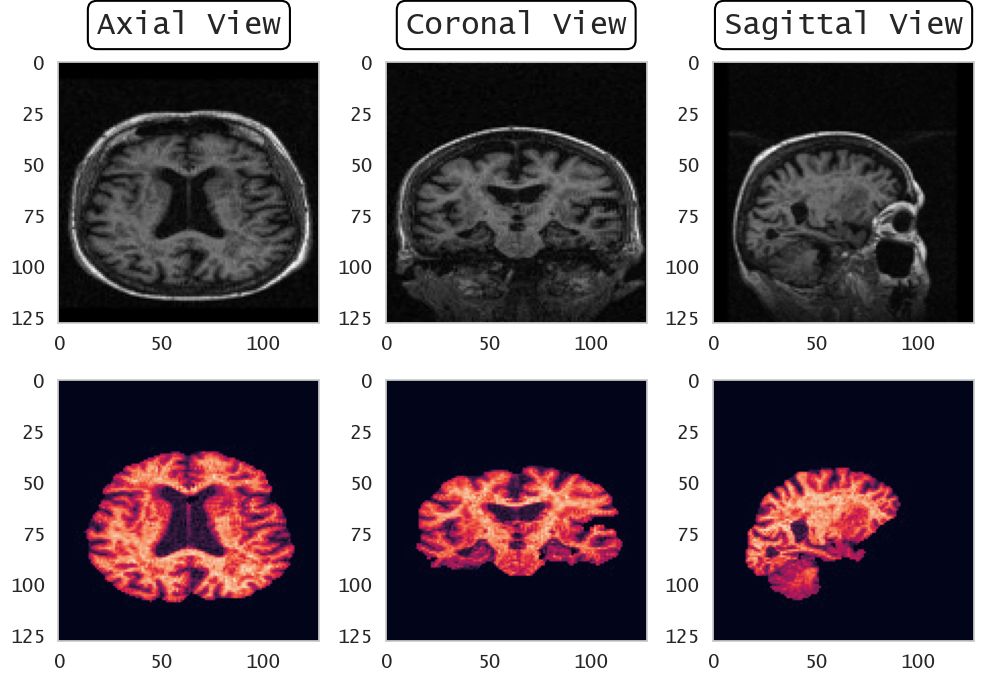

In [4]:
# Image paths
original_paths = [
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced\train\axial\moderate_dementia\OAS2_0087_MR2_mpr-1_axial_slice_20.jpg',
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced\train\coronal\moderate_dementia\OAS2_0087_MR2_mpr-2_coronal_slice_23.jpg',
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced\train\sagittal\moderate_dementia\OAS2_0087_MR2_mpr-1_sagittal_slice_5.jpg'
]

masked_paths = [
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced_ss\train\axial\moderate_dementia\OAS2_0087_MR2_mpr-1_axial_slice_20_masked.jpg',
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced_ss\train\coronal\moderate_dementia\OAS2_0087_MR2_mpr-2_coronal_slice_23_masked.jpg',
    r'D:\Research\Vision\mra\alz-cq-cnn\datasets\OASIS-2\preprocessed_balanced_ss\train\sagittal\moderate_dementia\OAS2_0087_MR2_mpr-1_sagittal_slice_5_masked.jpg'
]

titles = ['Axial View', 'Coronal View', 'Sagittal View']

plt.figure(figsize=(10, 7))

# Plot original images (top row) with bordered titles
for i, (path, title) in enumerate(zip(original_paths, titles)):
    img = Image.open(path).convert('L')
    img_resized = img.resize((128, 128))
    ax = plt.subplot(2, 3, i + 1)
    ax.imshow(img_resized, cmap='gray')
    ax.set_title(
        title,
        fontsize=22,
        fontname='Lucida Console',
        fontweight='bold',
        pad=20,
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1.5)
    )
    ax.grid(False)
    ax.tick_params(labelsize=14, labelfontfamily='Lucida Console')

# Plot masked images (bottom row)
for i, path in enumerate(masked_paths):
    img = Image.open(path).convert('L')
    img_resized = img.resize((128, 128))
    ax = plt.subplot(2, 3, i + 4)
    ax.imshow(img_resized)
    ax.grid(False)
    ax.tick_params(labelsize=14, labelfontfamily='Lucida Console')

plt.tight_layout()
plt.savefig('../plots/outputs/mri-2d.png', bbox_inches='tight', dpi=200)
plt.show()